# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [109]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib
from functools import reduce

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [38]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [39]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [40]:
# your answer here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

### Comentarios:
Los datos corresponden a 3 tipos de atributos diferentes. 'City' y 'State' son tipo object (str) y 'Temperature' es tipo float64(número con decimales).

#### Select the rows where state is New York

In [41]:
# your answer here
temp_nyc = temp[0:3]
display(temp_nyc)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [42]:
# your answer here
temp_nyc.mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [43]:
# your answer here
temp_p15 = temp.loc[temp['Temperature'] > 15]
display(temp_p15)

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [44]:
# your answer here
temp_p15['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [45]:
# your answer here
temp_p20 = temp.loc[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]
display(temp_p20)

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [66]:
# your answer here
mean_temp = temp.groupby('State', as_index=False).agg({'Temperature':'mean'}).rename(columns={"Temperature":"mean"})
std_temp = temp.groupby('State', as_index=False).agg({'Temperature':'std'}).rename(columns={"Temperature":"std"})
stats_temp = pd.merge(mean_temp,std_temp,on='State')
display(mean_temp,std_temp,stats_temp)

,State,mean
0,Connecticut,15.833333
1,New Jersey,21.111111
2,New York,10.740741


,State,std
0,Connecticut,1.964186
1,New Jersey,1.571348
2,New York,8.133404


,State,mean,std
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [67]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [68]:
# your answer here
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

### Comentarios
Son 7 atributos de los cuales 5 son del tipo object (str) y 2 del tipo int64 (int).

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8798bd6d68>,
      dtype=object)

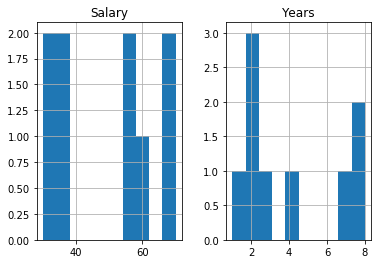

In [69]:
# your answer here
%matplotlib inline
employee.hist()

#### What's the average salary in this company?

In [70]:
# your answer here
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [71]:
# your answer here
employee['Salary'].max()

70

#### What's the lowest salary?

In [72]:
# your answer here
min = employee['Salary'].min()

#### Who are the employees with the lowest salary?

In [73]:
# your answer here
employee_min = employee.loc[employee['Salary'] == min]
display(employee_min)

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [74]:
# your answer here
employee.loc[employee['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [75]:
# your answer here
employee.loc[employee['Name'] == 'David',['Name','Salary']]

,Name,Salary
2,David,30


#### Print all the rows where job title is associate

In [76]:
# your answer here
employee.loc[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [77]:
# your answer here- 1 method
employee.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [78]:
# your answer here- 2nd method
employee.loc[0:2]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [79]:
# your answer here
employee.loc[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [80]:
# your answer here
employee_years = employee.groupby('Years', as_index=False).agg({'Salary':'mean'})
display(employee_years)

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [81]:
# your answer here
employee_title = employee.groupby('Title', as_index=False).agg({'Salary':'mean'})
display(employee_title)

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

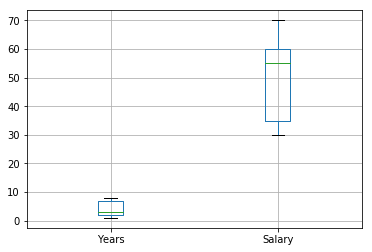

In [62]:
# draw boxplot here
%matplotlib inline
employee.boxplot()

In [92]:
# print first quartile here
stats = employee.describe()
print(stats)
stats.loc[stats['Years']]#, index='25%']

          Years     Salary
count  9.000000   9.000000
mean   4.111111  48.888889
std    2.803767  16.541194
min    1.000000  30.000000
25%    2.000000  35.000000
50%    3.000000  55.000000
75%    7.000000  60.000000
max    8.000000  70.000000


KeyError: 'None of [count    9.000000\nmean     4.111111\nstd      2.803767\nmin      1.000000\n25%      2.000000\n50%      3.000000\n75%      7.000000\nmax      8.000000\nName: Years, dtype: float64] are in the [index]'

In [ ]:
# print third quartile here

#### Is the mean salary per gender different?

In [93]:
# your answer here
employee_gender = employee.groupby('Gender', as_index=False).agg({'Salary':'mean'})
display(employee_gender)

,Gender,Salary
0,F,47.5
1,M,50.0


Si el salario medio por género es diferente (es mayor el de los hombres que el de las mujeres).

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [94]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [111]:
# your answer here
def department(column,stat):
    data_frame = employee.groupby('Department',as_index=False).agg({column:stat}).rename(columns={column:column+'('+stat+')'})
    return data_frame
dept = [department('Years','min'),department('Years','mean'),department('Years','max'),department('Salary','min'),department('Salary','mean'),department('Salary','max')]
dept_stat = reduce(lambda left,right: pd.merge(left,right,on='Department'), dept)
#display(department('Years','min'),department('Years','mean'),department('Years','max'),department('Salary','min'),department('Salary','mean'),department('Salary','max'))
display(dept_stat)

,Department,Years(min),Years(mean),Years(max),Salary(min),Salary(mean),Salary(max)
0,HR,2,4.666667,8,30,45.00,70
1,IT,1,4.500000,8,30,48.75,70
2,Sales,2,2.500000,3,55,55.00,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [ ]:
# your answer here


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
# your answer here

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
# your answer here

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [ ]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here